In [ ]:
#importing basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#import salary dataset into colab notebook in the format of excel file
from google.colab import files
data=files.upload()

Saving simple linear regression.xlsx to simple linear regression.xlsx


In [ ]:
#creating a datafram as df
import io
df=pd.read_excel(io.BytesIO(data['simple linear regression.xlsx']))

In [ ]:
#to check the first five rows data from the dataset
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
#to find how many rows and columns are present in the dataset
df.shape

(30, 2)

so, there are 30 rows and 2columns

In [ ]:
#to find any null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

so,there is no null values

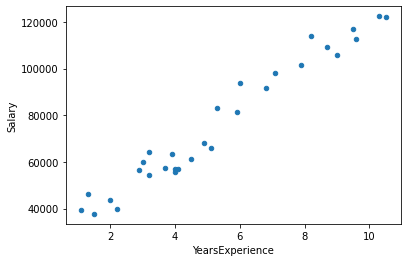

In [ ]:
df.plot(kind='scatter',x='YearsExperience',y='Salary')
plt.show()

In [ ]:
df.corr()   #correlation coefficient

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


here we got the accuracy 97% using correlation method let the model test and test data also get the same

In [ ]:
x = df.drop(['Salary'],axis=1).values     #selecting only input values
y = df['Salary'].values          #selecting only output values

In [ ]:
print(x)    #printing the "x" values in an array format

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)      #printing the "y" values in an array format

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9740993407213511

here we got the same accuracy after train the model

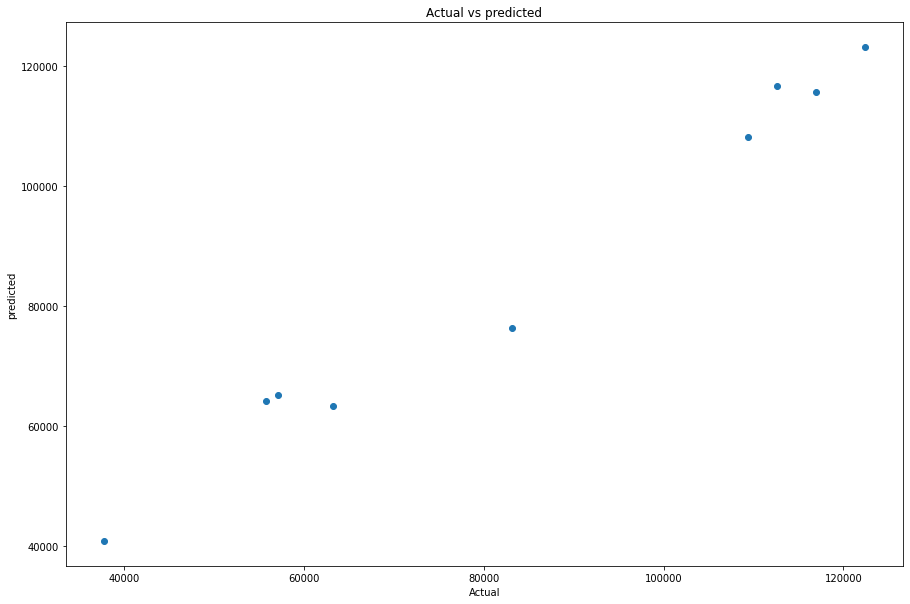

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

so, finally calculating the diffrence between the predicted and actual values

In [ ]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual value,predicted value,Difference
0,37731,40817.783270,-3086.783270
1,122391,123188.082589,-797.082589
2,57081,65154.462615,-8073.462615
3,63218,63282.410357,-64.410357
4,116969,115699.873560,1269.126440
5,109431,108211.664531,1219.335469
6,112635,116635.899689,-4000.899689
7,55794,64218.436486,-8424.436486
8,83088,76386.776158,6701.223842
